In [246]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
   

In [247]:
import pandas as pd
import numpy as np

In [248]:
df = pd.concat([X, y], axis=1)

In [249]:
df.fillna({
    'workclass': 'Unknown', 
    'occupation': 'Unknown', 
    'native-country': 'Unknown'
}, inplace=True)

In [250]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Unknown,321403,HS-grad,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [251]:
df['native-country'] = df['native-country'].replace('?', 'Unknown')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [253]:
df.drop(columns="education", inplace= True)

In [254]:
df['income'] = df['income'].map({'<=50K': 0,'<=50K.':0, '>50K': 1, '>50K.':1})

df['family_size'] = df['relationship'].map({
    'Wife': 2, 'Own-child': 3, 'Husband': 2, 'Not-in-family': 1,
    'Other-relative': 3, 'Unmarried': 1})
    
df['log_capital_gain'] = df['capital-gain'].apply(lambda x: np.log(x + 1))
df['log_capital_loss'] = df['capital-loss'].apply(lambda x: np.log(x + 1))
#df["education-num"] = df["education-num"].apply(lambda x: np.log(x+1))
df["hours-per-week"] = df["hours-per-week"].apply(lambda x: np.log(x))

#df['education_years_to_age_ratio'] = (df['education-num'] / df['age'])
#df['education_years_age_int'] = df['education-num'] * df['age']
df["gain_loss_int"] = df["log_capital_gain"] - df["log_capital_loss"]
#df["gain_loss_int"] = df["capital-gain"] - df["capital-loss"]
#df["hours-ed-int"] = df["education-num"] * df["hours-per-week"]

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
X = df.drop(columns=["income", "relationship", "race", "native-country"]) # "relationship", "capital-gain", "capital-loss"
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)


num_transformer = make_pipeline(StandardScaler())


cat_transformer = make_pipeline(OneHotEncoder(drop="if_binary", handle_unknown='ignore'))
    

num_features = make_column_selector(dtype_include="number")
cat_features = make_column_selector(dtype_include= "object")

preprocessor = make_column_transformer ((num_transformer, num_features), (cat_transformer, cat_features))


#classifiers = [LogisticRegression(max_iter=1000, random_state=42), 
               #RandomForestClassifier(n_jobs=-1, random_state=42), SVC(random_state=42)
             # KNeighborsClassifier(n_jobs=-1)]



#for classifier in classifiers:
   # pipe = make_pipeline(preprocessor, classifier)
    #grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="accuracy")
    #grid.fit(X_train, y_train)
    
    #print(f"Best Cross fold score {classifier}: {grid.best_score_}")
    #print ("")

0.9006113077305566


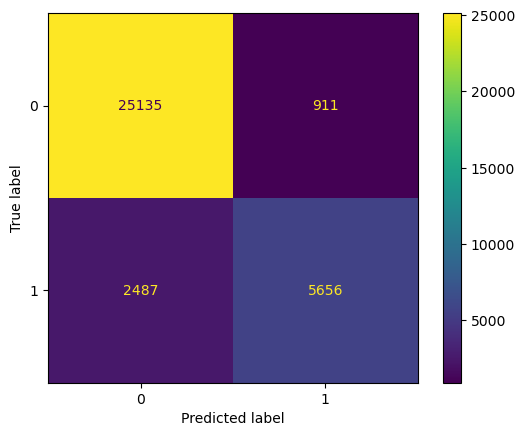

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, precision_recall_curve
clf = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth= 50,min_samples_leaf=3, n_estimators=200)
pipe = make_pipeline(preprocessor, clf)

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_train)

acc = accuracy_score(y_train, predictions)

print (acc)
ConfusionMatrixDisplay.from_estimator(pipe, X_train, y_train)

In [139]:
param_grid_rf = {"randomforestclassifier__n_estimators": [200,150],
                "randomforestclassifier__min_samples_leaf": [1,2],
                "randomforestclassifier__max_depth": [60, 50]}

classifier = RandomForestClassifier(n_jobs=-1)
pipe = make_pipeline(preprocessor, classifier)

grid_rf = GridSearchCV(estimator=pipe, param_grid=param_grid_rf, cv=5, scoring="accuracy")

grid_rf.fit(X_train, y_train)

print(f"Best Score from folds: {grid_rf.best_score_}")
print(f"Best Params from folds: {grid_rf.best_params_}")

print(f"Accuracy: {accuracy_score(y_train, grid_rf.predict(X_train))}")
print(f"Precision: {precision_score(y_train, grid_rf.predict(X_train))}")
print(f"Recall: {recall_score(y_train, grid_rf.predict(X_train))}")

ConfusionMatrixDisplay.from_estimator(grid_rf, X_train, y_train)

KeyboardInterrupt: 

Test Accuracy: 0.8697195113628609
Test Precision: 0.7963030083363537
Test recall: 0.619920993227991
AUC-ROC: 0.9208
F1 Score: 0.6971


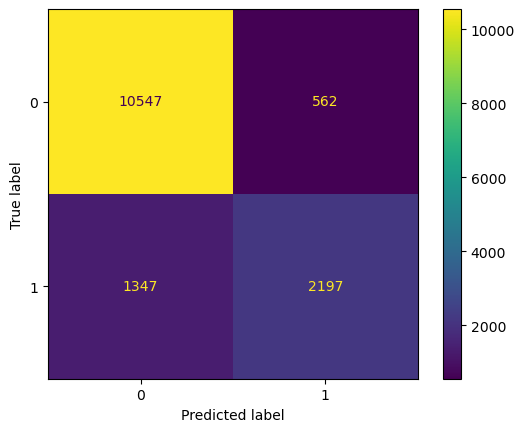

In [262]:
y_pred = pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc}")
test_prec = precision_score(y_test, y_pred)
print(f"Test Precision: {test_prec}")
test_recc = recall_score(y_test, y_pred)
print(f"Test recall: {test_recc}")

# AUC-ROC
auc_roc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
print(f'AUC-ROC: {auc_roc:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test)

In [261]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create the baseline model
baseline_model = DummyClassifier(strategy="most_frequent")

# Fit the baseline model to the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the training data
baseline_train_predictions = baseline_model.predict(X_train)

# Make predictions on the testing data
baseline_test_predictions = baseline_model.predict(X_test)

# Calculate accuracy scores
baseline_train_accuracy = accuracy_score(y_train, baseline_train_predictions)
baseline_test_accuracy = accuracy_score(y_test, baseline_test_predictions)

print(f'Baseline Training accuracy: {baseline_train_accuracy:.4f}')
print(f'Baseline Testing accuracy: {baseline_test_accuracy:.4f}')

baseline_precision = precision_score(y_test, baseline_test_predictions)
baseline_recall = recall_score(y_test, baseline_test_predictions)

print(f'Baseline Precision: {baseline_precision:.4f}')
print(f'Baseline Recall: {baseline_recall:.4f}')

# AUC-ROC
auc_roc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
print(f'AUC-ROC: {auc_roc:.4f}')

# F1 Score
f1 = f1_score(y_test, baseline_test_predictions)
print(f'F1 Score: {f1:.4f}')

Baseline Training accuracy: 0.7618
Baseline Testing accuracy: 0.7581
Baseline Precision: 0.0000
Baseline Recall: 0.0000
AUC-ROC: 0.5000
F1 Score: 0.0000


C:\Users\X360\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


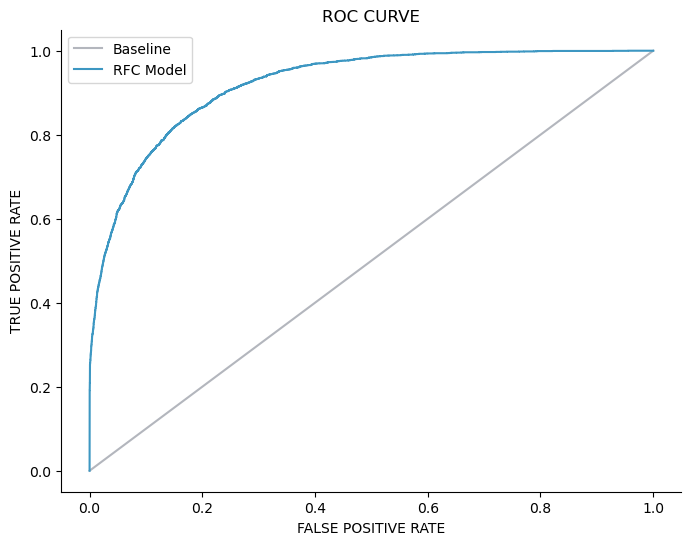

In [286]:
# Calculate ROC curve for baseline model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate ROC curve for baseline model
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:, 1])

# Calculate ROC curve for your model
fpr_model, tpr_model, _ = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_baseline, tpr_baseline, label='Baseline', color="#b3b6bd")
plt.plot(fpr_model, tpr_model, label='RFC Model', color="#3d97c2")
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVE')
plt.legend()
plt.grid(False)
sns.despine(top=True, bottom=False, left=False)
plt.savefig("roc_curve_dist.png", transparent = True)
plt.show()

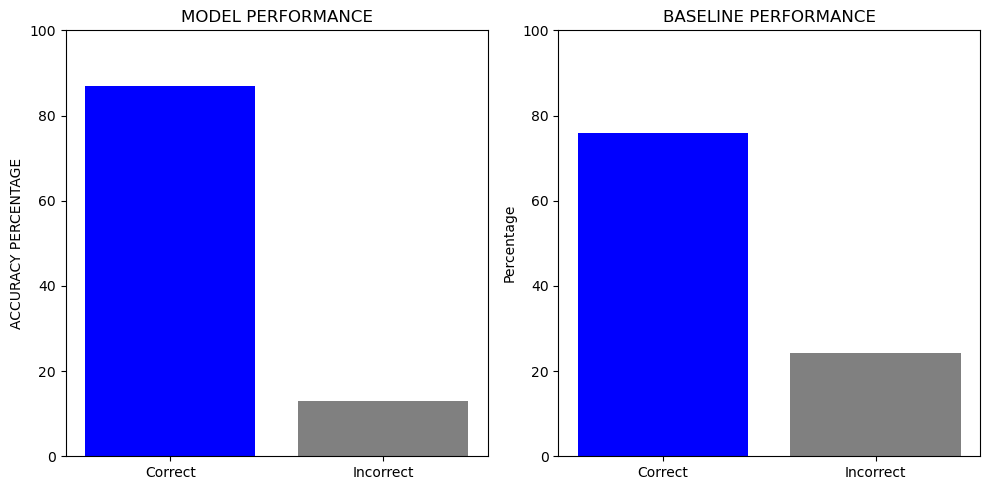

In [288]:
# Calculate confusion matrix for your model
cm_model = confusion_matrix(y_test, y_pred)
total_model = np.sum(cm_model)
correct_model = np.trace(cm_model)
incorrect_model = total_model - correct_model

# Calculate confusion matrix for the baseline
cm_baseline = confusion_matrix(y_test, baseline_test_predictions)
total_baseline = np.sum(cm_baseline)
correct_baseline = np.trace(cm_baseline)
incorrect_baseline = total_baseline - correct_baseline

# Calculate percentages
percent_correct_model = (correct_model / total_model) * 100
percent_incorrect_model = (incorrect_model / total_model) * 100

percent_correct_baseline = (correct_baseline / total_baseline) * 100
percent_incorrect_baseline = (incorrect_baseline / total_baseline) * 100

# Plot percentages
labels = ['Correct', 'Incorrect']
model_percents = [percent_correct_model, percent_incorrect_model]
baseline_percents = [percent_correct_baseline, percent_incorrect_baseline]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, model_percents, color=['#3d97c2', 'gray'])
plt.title('MODEL PERFORMANCE')
plt.ylabel('ACCURACY PERCENTAGE')
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.bar(labels, baseline_percents, color=['blue', 'gray'])
plt.title('BASELINE PERFORMANCE')
plt.ylabel('Percentage')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

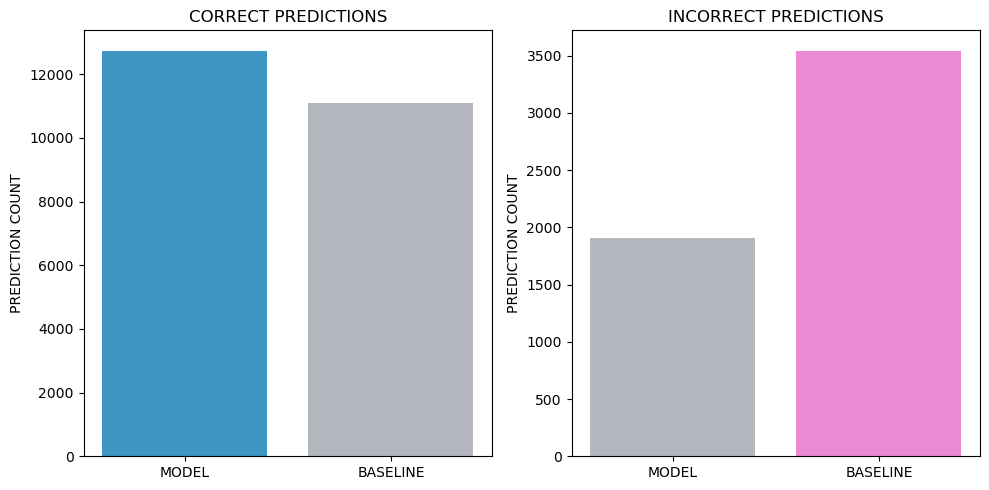

In [296]:
cm_model = confusion_matrix(y_test, y_pred)
total_correct_model = np.trace(cm_model)
total_incorrect_model = np.sum(cm_model) - total_correct_model

# Calculate confusion matrix for the baseline
cm_baseline = confusion_matrix(y_test, baseline_test_predictions)
total_correct_baseline = np.trace(cm_baseline)
total_incorrect_baseline = np.sum(cm_baseline) - total_correct_baseline

# Plot correct predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['MODEL', 'BASELINE'], [total_correct_model, total_correct_baseline], color=['#3d97c2', '#b3b6bd'])
plt.title('CORRECT PREDICTIONS')
plt.ylabel('PREDICTION COUNT')



# Plot incorrect predictions
plt.subplot(1, 2, 2)
plt.bar(['MODEL', 'BASELINE'], [total_incorrect_model, total_incorrect_baseline], color=['#b3b6bd', '#ea8ad6'])
plt.title('INCORRECT PREDICTIONS')
plt.ylabel('PREDICTION COUNT')


plt.tight_layout()
plt.show()

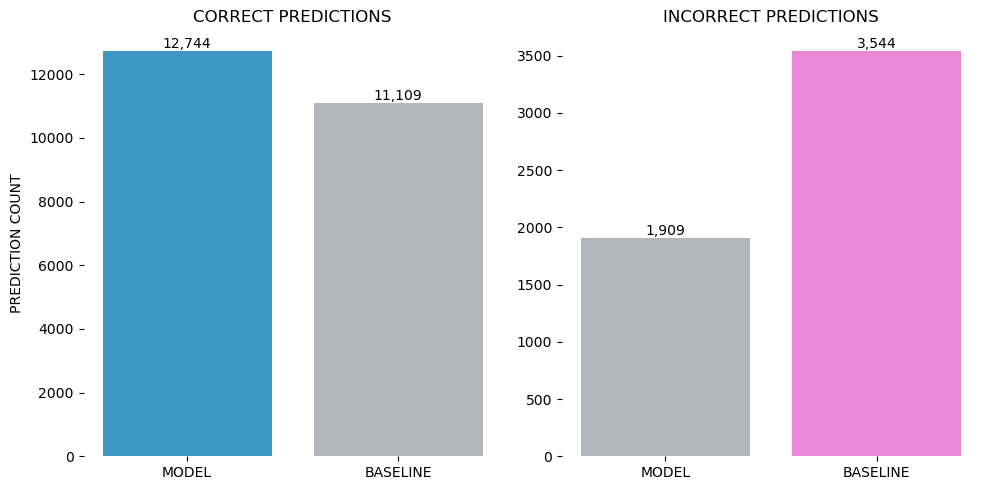

In [301]:
# Calculate confusion matrix for your model
cm_model = confusion_matrix(y_test, y_pred)
correct_model = cm_model[1, 1] + cm_model[0, 0]  # Correct predictions are on the diagonal
incorrect_model = cm_model[1, 0] + cm_model[0, 1]

# Calculate confusion matrix for the baseline
cm_baseline = confusion_matrix(y_test, baseline_test_predictions)
correct_baseline = cm_baseline[1, 1] + cm_baseline[0, 0]  # Correct predictions are on the diagonal
incorrect_baseline = cm_baseline[1, 0] + cm_baseline[0, 1]

# Plot correct predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(['MODEL', 'BASELINE'], [correct_model, correct_baseline], color=['#3d97c2', '#b3b6bd'])
plt.title('CORRECT PREDICTIONS')
plt.ylabel('PREDICTION COUNT')

# Add formatted numbers for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval), ha='center', va='bottom')

# Plot incorrect predictions
plt.subplot(1, 2, 2)
bars = plt.bar(['MODEL', 'BASELINE'], [incorrect_model, incorrect_baseline], color=['#b3b6bd', '#ea8ad6'])
plt.title('INCORRECT PREDICTIONS')
plt.ylabel(None)

# Add formatted numbers for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval), ha='center', va='bottom')

plt.tight_layout()
sns.despine(top=True, bottom=True, left=True)
plt.savefig("predicitions.png", transparent = True)

plt.show()

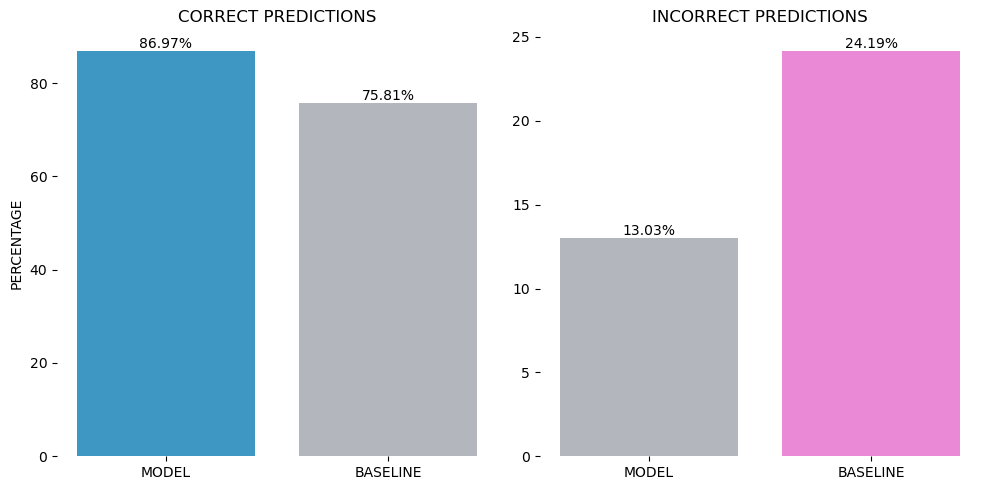

In [318]:
cm_model = confusion_matrix(y_test, y_pred)
total_model = np.sum(cm_model)
correct_model = np.trace(cm_model)
incorrect_model = total_model - correct_model

# Calculate confusion matrix for the baseline
cm_baseline = confusion_matrix(y_test, baseline_test_predictions)
total_baseline = np.sum(cm_baseline)
correct_baseline = np.trace(cm_baseline)
incorrect_baseline = total_baseline - correct_baseline

# Calculate percentages
percent_correct_model = (correct_model / total_model) * 100
percent_incorrect_model = (incorrect_model / total_model) * 100

percent_correct_baseline = (correct_baseline / total_baseline) * 100
percent_incorrect_baseline = (incorrect_baseline / total_baseline) * 100

# Plot correct predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bars = plt.bar(['MODEL', 'BASELINE'], [percent_correct_model, percent_correct_baseline], color=['#3d97c2', '#b3b6bd'])
plt.title('CORRECT PREDICTIONS')
plt.ylabel('PERCENTAGE')

# Add formatted percentages for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.2f}%'.format(yval), ha='center', va='bottom')

# Plot incorrect predictions
plt.subplot(1, 2, 2)
bars = plt.bar(['MODEL', 'BASELINE'], [percent_incorrect_model, percent_incorrect_baseline], color=['#b3b6bd', '#ea8ad6'])
plt.title('INCORRECT PREDICTIONS')
plt.ylabel(None)

# Add formatted percentages for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.2f}%'.format(yval), ha='center', va='bottom')
sns.despine(top=True, bottom=True, left=True)

plt.tight_layout()
plt.savefig("predicitions_per.png", transparent = True)

plt.show()

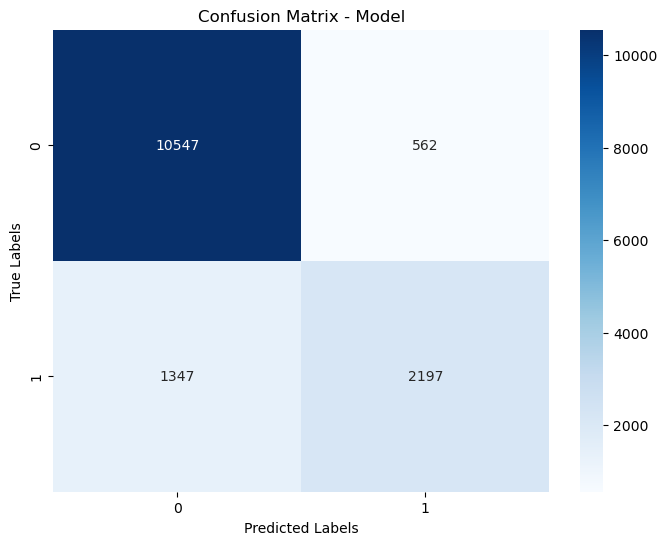

In [306]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model')
plt.show()

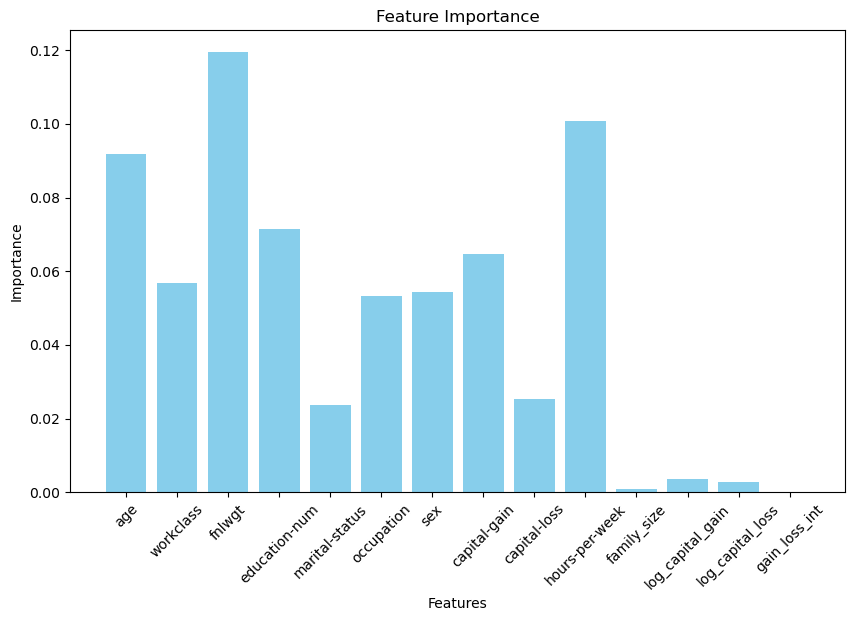

In [316]:
# Assuming your model is a Random Forest Classifier and already trained
feature_importance = pipe.named_steps['randomforestclassifier'].feature_importances_

# Subset feature importances to match features in X_test
features = X_test.columns
subset_importance = feature_importance[:len(features)]

plt.figure(figsize=(10, 6))
plt.bar(features, subset_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

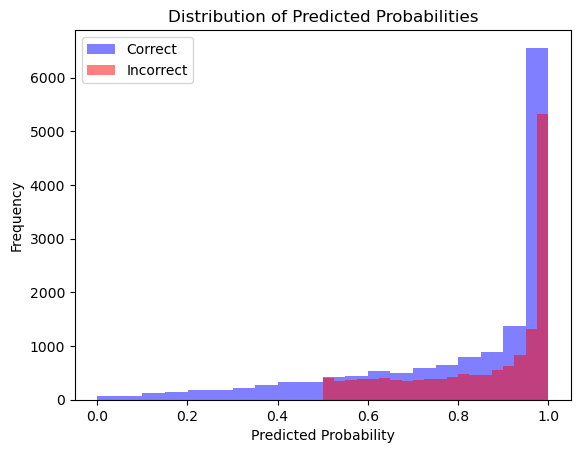

In [308]:
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices]

# Assuming your model supports predict_proba()
probs = pipe.predict_proba(X_test)
correct_probs = probs[np.arange(len(probs)), y_test]
incorrect_probs = np.max(probs, axis=1)

# Plot histograms of predicted probabilities for correct and incorrect predictions
plt.hist(correct_probs, bins=20, alpha=0.5, label='Correct', color='blue')
plt.hist(incorrect_probs, bins=20, alpha=0.5, label='Incorrect', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

In [310]:
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.iloc[misclassified_indices]

# Visualize or analyze misclassified instances
print("Misclassified Instances:")
print(misclassified_samples)

Misclassified Instances:
       age     workclass  fnlwgt  education-num      marital-status  \
22608   34       Private  261799             11  Married-civ-spouse   
18627   62       Private   24515              5  Married-civ-spouse   
21063   64     State-gov  111795             13  Married-civ-spouse   
29642   45  Self-emp-inc  204196             13            Divorced   
23638   47       Private   47247             10  Married-civ-spouse   
...    ...           ...     ...            ...                 ...   
24993   49       Private  189498              9  Married-civ-spouse   
41443   45       Private   83993             12            Divorced   
5632    45             ?  189564             14  Married-civ-spouse   
6532    49       Private  176814             10  Married-civ-spouse   
7696    40       Private  116103             10           Separated   

            occupation     sex  capital-gain  capital-loss  hours-per-week  \
22608     Adm-clerical    Male             0

In [312]:
probs = pipe.predict_proba(X_test)
diff_probs = np.max(probs, axis=1) - np.partition(probs, -2, axis=1)[:, -2]

# Set a threshold for prediction uncertainty
uncertain_threshold = 0.5  # Adjust as needed

# Find instances with high prediction uncertainty
uncertain_indices = np.where(diff_probs > uncertain_threshold)[0]
uncertain_samples = X_test.iloc[uncertain_indices]

# Visualize or analyze instances with high prediction uncertainty
print("Instances with High Prediction Uncertainty:")
print(uncertain_samples)

Instances with High Prediction Uncertainty:
       age         workclass  fnlwgt  education-num         marital-status  \
7762    18           Private  423024              9          Never-married   
23881   17           Private  178953              8          Never-married   
30507   25         Local-gov  348986              9          Never-married   
28911   20           Private  218215             10          Never-married   
19484   47           Private  244025              9          Never-married   
...    ...               ...     ...            ...                    ...   
30925   24  Self-emp-not-inc  375313             10          Never-married   
697     31           Private  118710             14     Married-civ-spouse   
27828   37  Self-emp-not-inc  286146              9  Married-spouse-absent   
28449   61           Private  227468              9               Divorced   
5647    30           Private  164190              9          Never-married   

              occup

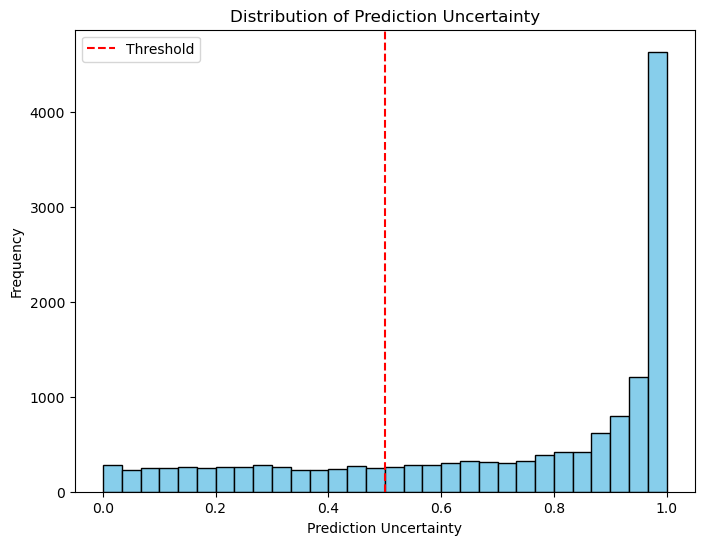

In [313]:
plt.figure(figsize=(8, 6))
plt.hist(diff_probs, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=uncertain_threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Prediction Uncertainty')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Uncertainty')
plt.legend()
plt.show()

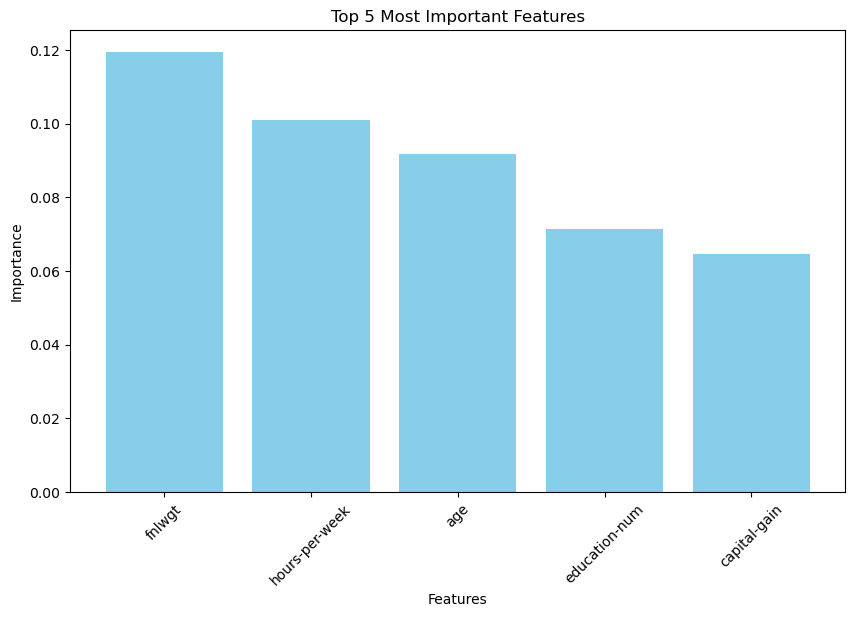

In [317]:
# Assuming your model is a Random Forest Classifier and already trained
feature_importance = pipe.named_steps['randomforestclassifier'].feature_importances_

# Get feature names
features = X_test.columns

# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(features, feature_importance))

# Sort the dictionary by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 most important features
top_features = sorted_features[:5]

# Unpack feature names and importances
top_feature_names, top_feature_importance = zip(*top_features)

# Plot the top 5 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features')
plt.xticks(rotation=45)
plt.show()

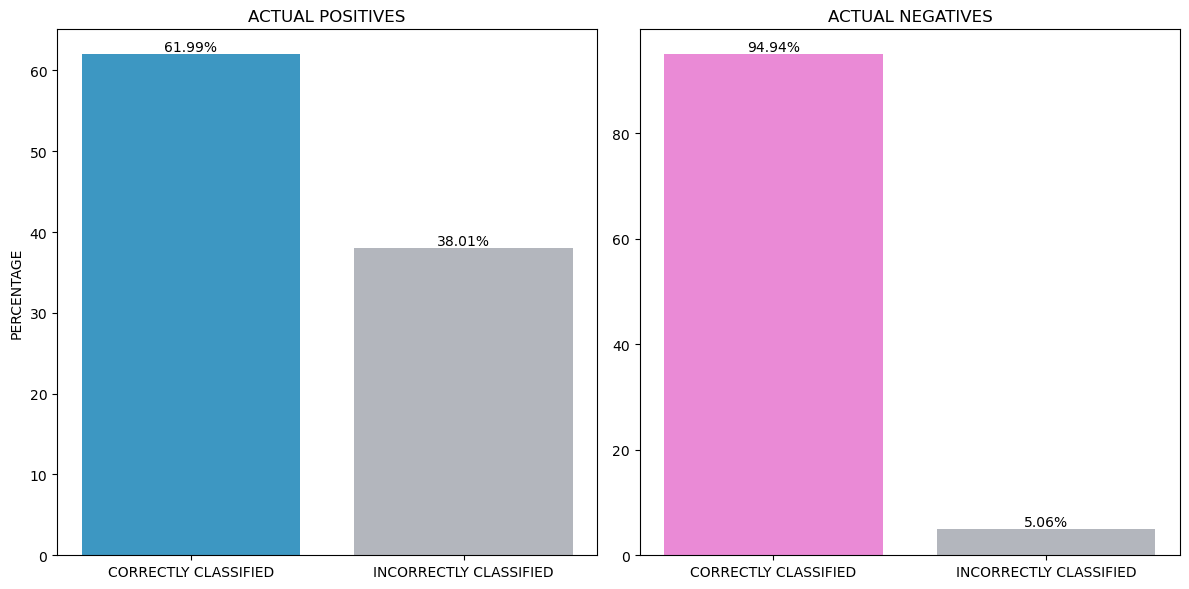

In [324]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate total positives and negatives
total_positives = tp + fn
total_negatives = tn + fp

# Calculate percentages for each category
percent_tp = (tp / total_positives) * 100 if total_positives != 0 else 0
percent_fn = (fn / total_positives) * 100 if total_positives != 0 else 0
percent_tn = (tn / total_negatives) * 100 if total_negatives != 0 else 0
percent_fp = (fp / total_negatives) * 100 if total_negatives != 0 else 0

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positives
axs[0].bar(['CORRECTLY CLASSIFIED', 'INCORRECTLY CLASSIFIED'], [percent_tp, percent_fn], color=['#3d97c2', '#b3b6bd'])
axs[0].set_title('ACTUAL POSITIVES')
axs[0].set_ylabel('PERCENTAGE')
for bar in axs[0].patches:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Plot for negatives
axs[1].bar(['CORRECTLY CLASSIFIED', 'INCORRECTLY CLASSIFIED'], [percent_tn, percent_fp], color=['#ea8ad6', '#b3b6bd'])
axs[1].set_title('ACTUAL NEGATIVES')
axs[1].set_ylabel(None)
for bar in axs[1].patches:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

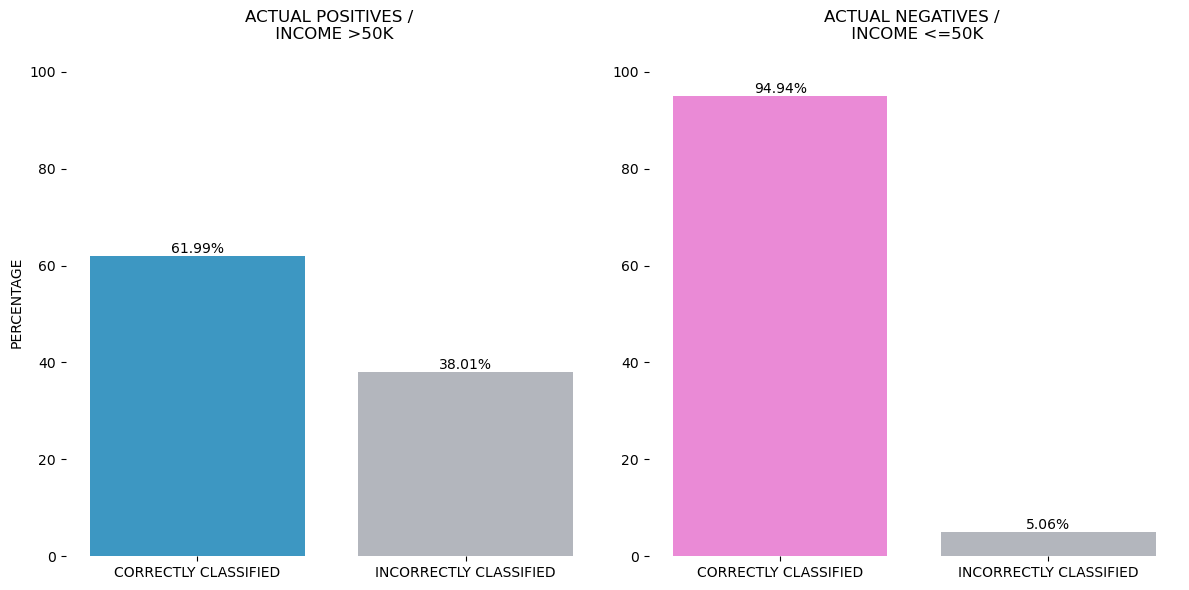

In [329]:
cm = confusion_matrix(y_test, y_pred)

# Extract the counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate total positives and negatives
total_positives = tp + fn
total_negatives = tn + fp

# Calculate percentages for each category
percent_tp = (tp / total_positives) * 100 if total_positives != 0 else 0
percent_fn = (fn / total_positives) * 100 if total_positives != 0 else 0
percent_tn = (tn / total_negatives) * 100 if total_negatives != 0 else 0
percent_fp = (fp / total_negatives) * 100 if total_negatives != 0 else 0

# Determine the maximum y limit for both plots
max_y = max(percent_tp, percent_fn, percent_tn, percent_fp) + 10  # Add some padding for visibility

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positives
axs[0].bar(['CORRECTLY CLASSIFIED', 'INCORRECTLY CLASSIFIED'], [percent_tp, percent_fn], color=['#3d97c2', '#b3b6bd'])
axs[0].set_title('ACTUAL POSITIVES / \n INCOME >50K')
axs[0].set_ylabel('PERCENTAGE')
axs[0].set_ylim(0, max_y)
for bar in axs[0].patches:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Plot for negatives
axs[1].bar(['CORRECTLY CLASSIFIED', 'INCORRECTLY CLASSIFIED'], [percent_tn, percent_fp], color=['#ea8ad6', '#b3b6bd'])
axs[1].set_title('ACTUAL NEGATIVES / \n INCOME <=50K')
axs[1].set_ylabel(None)
axs[1].set_ylim(0, max_y)
for bar in axs[1].patches:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
sns.despine(top=True, bottom=True, left=True)
plt.tight_layout()
plt.savefig("tp_tn_fp_fn_per.png", transparent = True)

plt.show()